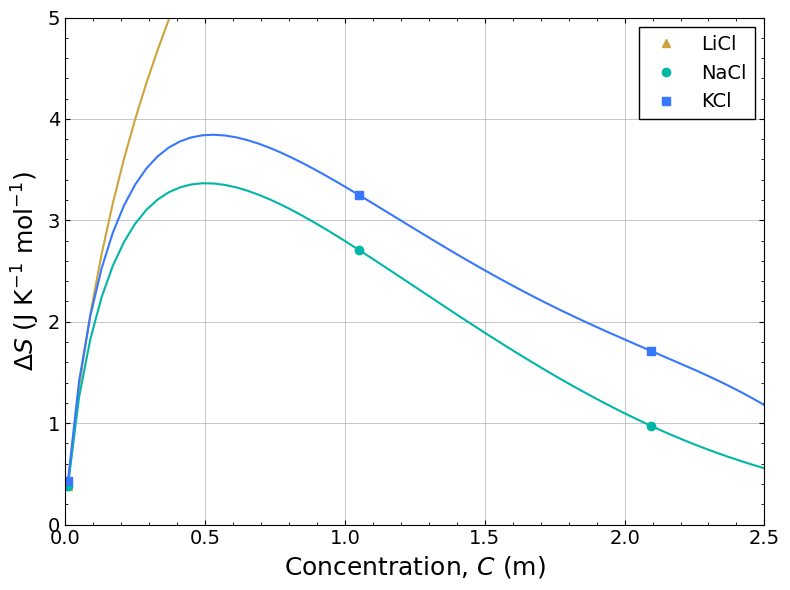

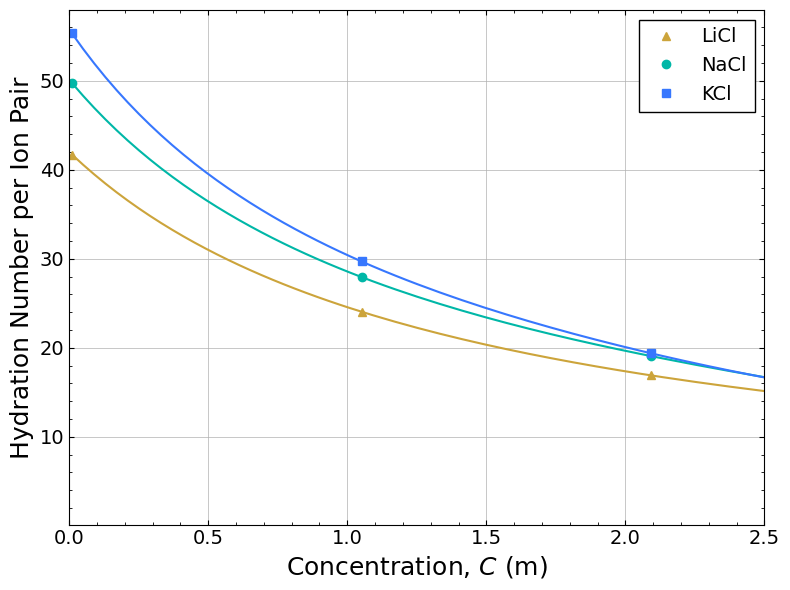

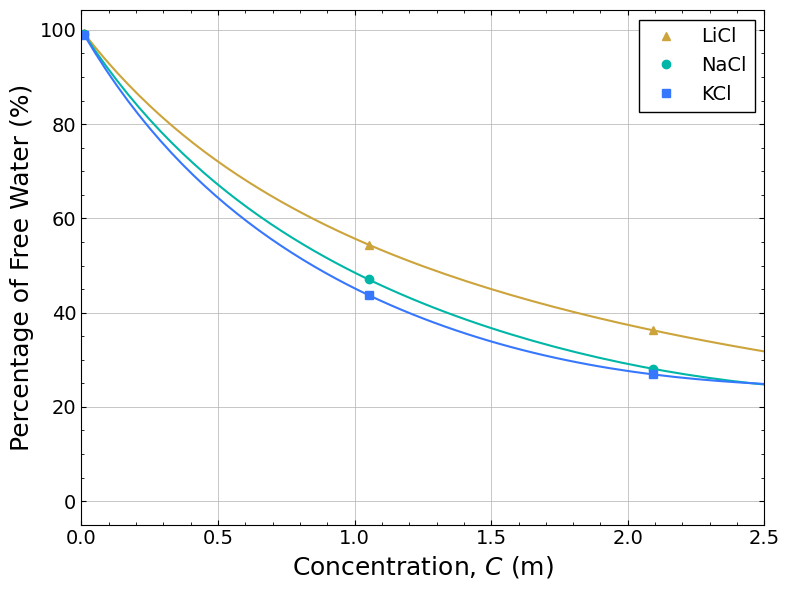

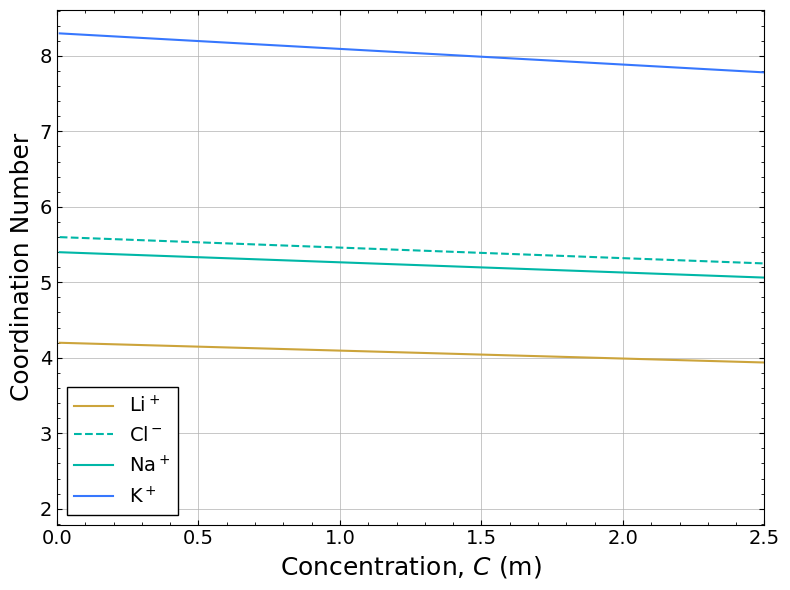

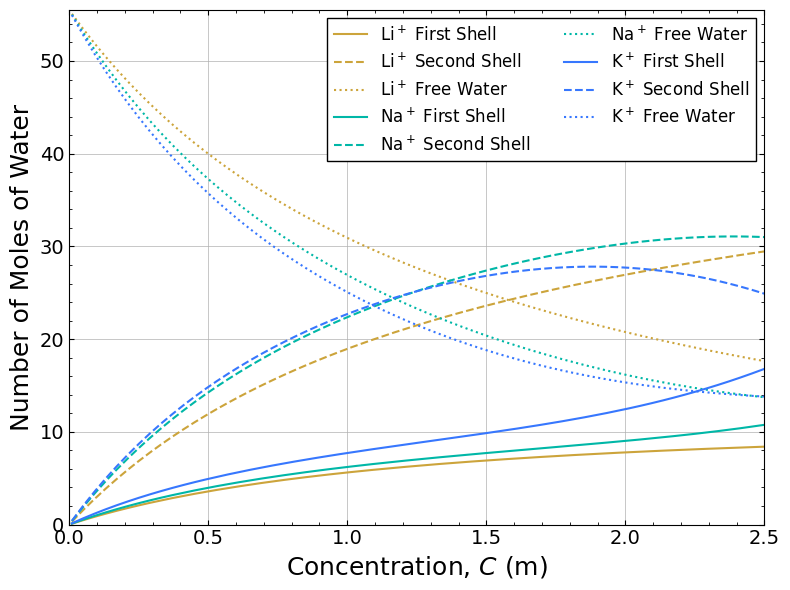

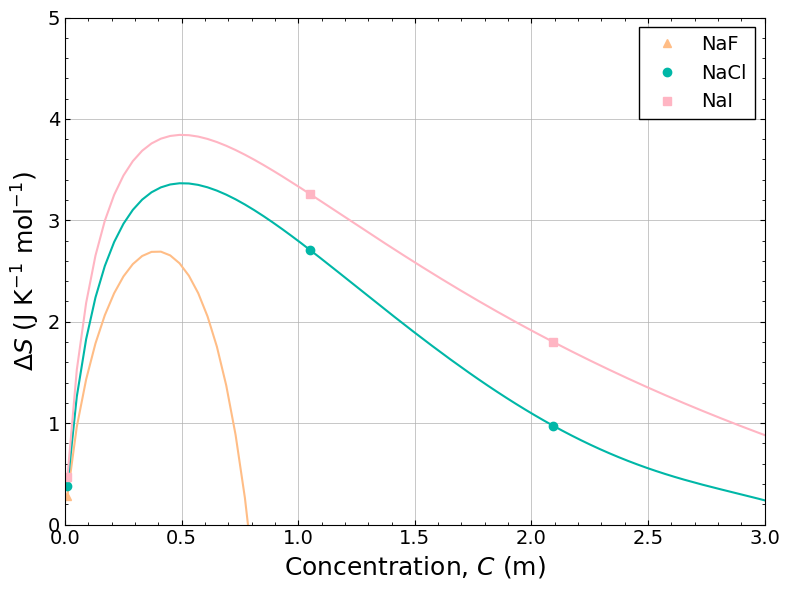

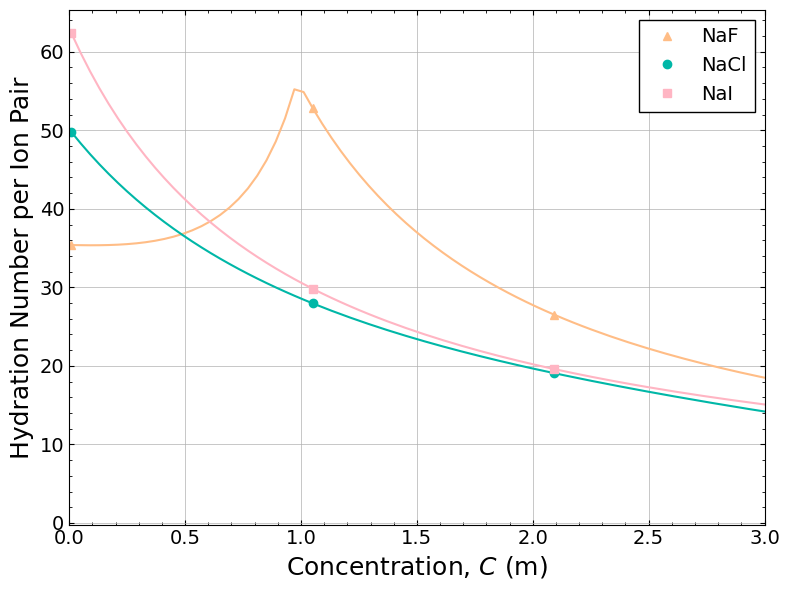

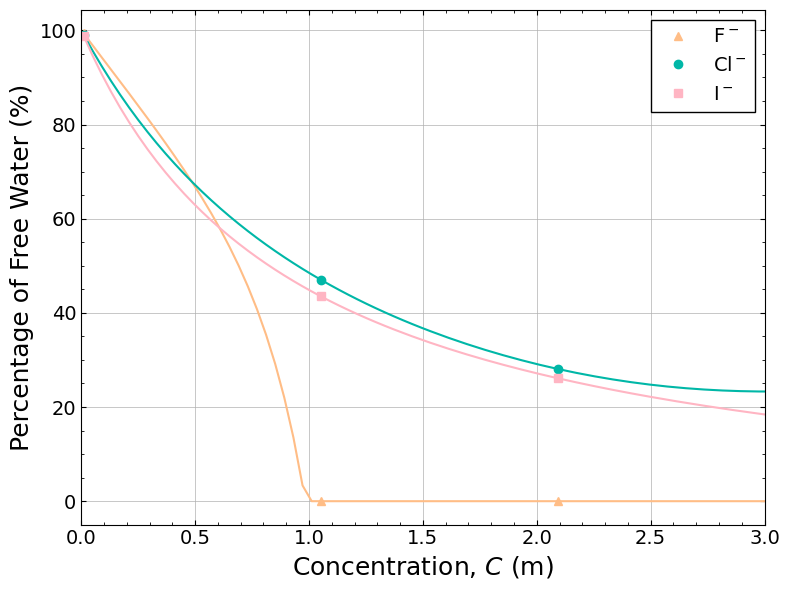

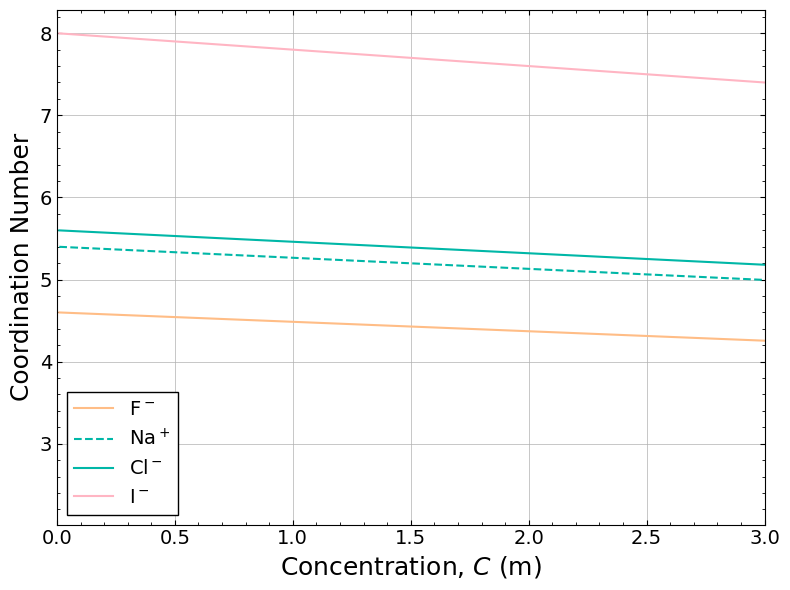

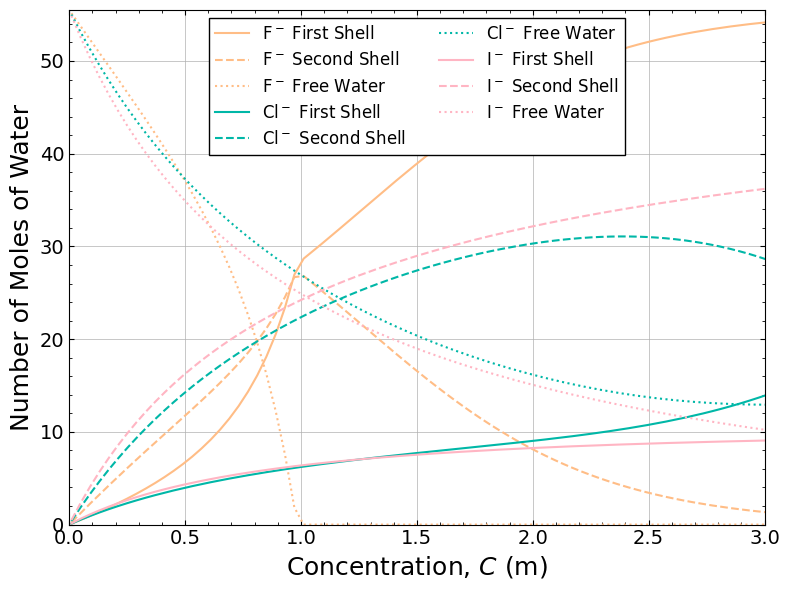

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator  # Import AutoMinorLocator

# Constants
R = 8.314     # Gas constant in J/(mol·K)
mol_water = 55.5  # mol

def get_salt_parameters(salt, conc):
    if salt == 'NaCl':
        # c_max_salt = 6.14  # Saturation concentration for NaCl - Heyrovska paper
        c_max_salt = 6.14  #https://diverdi.colostate.edu/all_courses/CRC%20reference%20data/solubility%20of%20inorganic%20compounds.pdf 
    elif salt == 'LiCl':
        # c_max_salt = 19.67 # Higher saturation concentration for LiCl, approximated from a conversion and assuming not huge amounts of electrostriction, which is likely an invalid assumption. However, in the context of this dataset, it is in a ballpark range such that it will show the low concentration treads in a qualitative manner
        c_max_salt = 19.53 #https://diverdi.colostate.edu/all_courses/CRC%20reference%20data/solubility%20of%20inorganic%20compounds.pdf
    elif salt == 'KCl':
        # c_max_salt = 4.83   # Saturation concentration for KCl
        c_max_salt = 4.56  #https://diverdi.colostate.edu/all_courses/CRC%20reference%20data/solubility%20of%20inorganic%20compounds.pdf
    elif salt == 'NaF':
        # c_max_salt = 0.983   # Low saturation concentration for NaF - Heyrovska paper
        c_max_salt = 0.96   #https://diverdi.colostate.edu/all_courses/CRC%20reference%20data/solubility%20of%20inorganic%20compounds.pdf
    elif salt == 'NaI':
        # c_max_salt = 12.29  # Saturation concentration for NaI - https://byjus.com/chemistry/sodium-iodide/ then converting g to mol and L to kg assuming using density of water and ignoring electrostriction occuring in the g/L measurement.
        c_max_salt = 11.81 #https://diverdi.colostate.edu/all_courses/CRC%20reference%20data/solubility%20of%20inorganic%20compounds.pdf
    else:
        raise ValueError("Invalid salt type")

    # Relate c_mid_second to c_max_salt
    alpha = 0.5  # Fraction of c_max_salt where the second shell coordination is half its maximum
    c_mid_second = alpha * c_max_salt

    # First Hydration Shell Coordination Numbers
    if salt in ['NaCl', 'NaF', 'NaI']:
        CN_cation = max(-0.025*5.4 * conc + 5.4, 0)  # Na⁺ - Coordinations from all of these taken from QMMM in Marcus Ion's in solution and their solvation, as these should be fairly consistent.
    elif salt == 'LiCl':
        CN_cation = max(-0.025*4.2 * conc + 4.2, 0)    # Li⁺
    elif salt == 'KCl':
        CN_cation = max(-0.025*8.3 * conc + 8.3, 0)    # K⁺

    if salt in ['NaCl', 'LiCl', 'KCl']:
        CN_anion = max(-0.025*5.6 * conc + 5.6, 0)   # Cl⁻
    elif salt == 'NaF':
        CN_anion = max(-0.025*4.6 * conc + 4.6, 0)     # F⁻
    elif salt == 'NaI':
        CN_anion = max(-0.025*8.0 * conc + 8.0, 0)     # I⁻

    # Microstate weights and other parameters for each salt
    if salt == 'NaCl':
        # w_cation = 1/15
        w_cation = 1/15.24
        # w_anion = 1/10
        w_anion = 1/6.25
        # w_first_cation = 1/6
        # w_first_anion = 1/12
        # w_second_cation = 1/3   #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        # w_second_anion = 1/4    #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        n_second_max_cation = 15.0 #https://pmc.ncbi.nlm.nih.gov/articles/PMC8487239/
        n_second_max_anion = 24.22 #https://pubs.rsc.org/en/content/articlehtml/2022/cp/d2cp00162d
    elif salt == 'LiCl':
        # w_cation = 1/20
        w_cation = 1/31.6
        # w_anion = 1/10
        w_anion = 1/6.25
        # w_first_cation = 1/10  
        # w_first_anion = 1/12
        # w_second_cation = 1/5 #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!  
        # w_second_anion = 1/4 #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        n_second_max_cation = 8 #https://link.springer.com/content/pdf/10.1140/epjd/e2019-100233-2.pdf
        n_second_max_anion = 24.22 #https://pubs.rsc.org/en/content/articlehtml/2022/cp/d2cp00162d
    elif salt == 'KCl':
        # w_cation = 1/8
        w_cation = 1/9.24
        # w_anion = 1/10
        w_anion = 1/6.25
        # w_first_cation = 1/5
        # w_first_anion = 1/12
        # w_second_cation = 1/2 #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        # w_second_anion = 1/4 #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        n_second_max_cation = 18.0 #https://pmc.ncbi.nlm.nih.gov/articles/PMC8487239/
        n_second_max_anion = 24.22 #https://pubs.rsc.org/en/content/articlehtml/2022/cp/d2cp00162d
    elif salt == 'NaF':
        w_cation = 1/15.24
        # w_anion = 1/12
        w_anion = 1/8.64
        # w_first_cation = 1/6
        # w_first_anion = 1/15
        # w_second_cation = 1/3 #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        # w_second_anion = 1/5 #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        n_second_max_cation = 15.0 #https://pmc.ncbi.nlm.nih.gov/articles/PMC8487239/
        n_second_max_anion = 24.22*4.6/5.6 #approximated using first solvation shell data for F and Cl and Cls second solvation shell data (need to refind the 15 I found) - struggling to find specific data - however I will note this number has only minor effects on the curve
    elif salt == 'NaI':
        w_cation = 1/15.24
        # w_anion = 1/8
        w_anion = 1/4.9
        # w_first_cation = 1/6
        # w_first_anion = 1/8
        # w_second_cation = 1/3   #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        # w_second_anion = 1/2    #These 2nd solvation shells appear to be the most important factor for the initial peak position and height!
        n_second_max_cation = 15.0 #https://pmc.ncbi.nlm.nih.gov/articles/PMC8487239/
        n_second_max_anion = 24.22*8/5.6 #approximated using first solvation shell data for I and Cl and Cls second solvation shell data (need to refind the 15 I found) - struggling to find specific data - however I will note this number has only minor effects on the curve
    # w_anion=1.2*w_anion #potentially have this as a factor for how much more directional the hydrogen bonding is?
    w_first_cation=w_cation
    w_first_anion=w_anion
    # w_cation=0.5*w_first_cation
    # w_anion=0.5*w_first_anion
    w_second_cation=3*w_first_cation
    w_second_anion=3*w_first_anion
    w_first_cation=0.75*w_cation
    w_first_anion=0.75*w_anion


    # Return parameters
    return {
        'CN_cation': CN_cation,
        'CN_anion': CN_anion,
        'w_cation': w_cation,
        'w_anion': w_anion,
        'w_first_cation': w_first_cation,
        'w_first_anion': w_first_anion,
        'w_second_cation': w_second_cation,
        'w_second_anion': w_second_anion,
        'n_second_max_cation': n_second_max_cation,
        'n_second_max_anion': n_second_max_anion,
        'c_max_salt': c_max_salt,
        'c_mid_second': c_mid_second
    }

def calculate_entropy(salt, concentrations):
    S_total = []
    N_all_total = []
    N_first_total = []
    N_second_total = []
    N_free_water_total = []
    hydration_number_per_ion_pair = []
    percentage_free_water = []
    CN_cation_list = []
    CN_anion_list = []

    for conc in concentrations:
        n_ion_pairs = conc  # mol
        n_cations = n_ion_pairs  # mol
        n_anions = n_ion_pairs  # mol

        # Get parameters for the selected salt
        params = get_salt_parameters(salt, conc)

        CN_cation = params['CN_cation']
        CN_anion = params['CN_anion']
        w_cation = params['w_cation']
        w_anion = params['w_anion']
        w_first_cation = params['w_first_cation']
        w_first_anion = params['w_first_anion']
        w_second_cation = params['w_second_cation']
        w_second_anion = params['w_second_anion']
        n_second_max_cation = params['n_second_max_cation']
        n_second_max_anion = params['n_second_max_anion']
        c_max_salt = params['c_max_salt']
        c_mid_second = params['c_mid_second']

        # Parameters for logistic function
        k_second = 2.0  # You can adjust this value as needed

        # First Hydration Shell
        N_first_cation = n_cations * CN_cation
        N_first_anion = n_anions * CN_anion
        N_first = N_first_cation + N_first_anion

        # Second Hydration Shell using logistic function
        n_second_cation = n_second_max_cation / (1 + np.exp(k_second * (conc - c_mid_second)))
        n_second_anion = n_second_max_anion / (1 + np.exp(k_second * (conc - c_mid_second)))
        N_second_cation = n_cations * n_second_cation
        N_second_anion = n_anions * n_second_anion
        N_second = N_second_cation + N_second_anion

        # Free Water Molecules (linear decrease)
        fraction_free_water = np.maximum(0, 1 - conc / c_max_salt)
        # fraction_free_water = np.maximum(0, np.exp(-1*(conc / c_max_salt))) #rapid decrease at low conc.
        N_free_water = mol_water * fraction_free_water

        # Total number of water moles
        total_N_water = N_first + N_second + N_free_water

        # Scale all layers so that total_N_water equals mol_water
        scaling_factor = mol_water / total_N_water
        N_first *= scaling_factor
        N_second *= scaling_factor
        N_free_water *= scaling_factor

        # Ensure total_N_water equals mol_water
        total_N_water = N_first + N_second + N_free_water
        assert np.isclose(total_N_water, mol_water, rtol=1e-6), "Total water moles do not match mol_water"

        # Total moles
        N_total = n_cations + n_anions + total_N_water

        # Mole fractions
        x_cation = n_cations / N_total
        x_anion = n_anions / N_total
        x_first = N_first / N_total
        x_second = N_second / N_total
        x_free = N_free_water / N_total

        # Handle zero mole fractions
        x_i = np.array([x_cation, x_anion, x_first, x_second, x_free])
        ln_x_i = np.zeros_like(x_i)
        valid = x_i > 0
        ln_x_i[valid] = np.log(x_i[valid])

        # Configurational Entropy
        S_config = -R * np.sum(x_i[valid] * ln_x_i[valid])

        # Microstate weights
        w_i = np.array([w_cation, w_anion, (w_first_cation + w_first_anion)/2, (w_second_cation + w_second_anion)/2, 1])
        ln_w_i = np.log(w_i)

        # Internal Entropy
        S_internal = R * np.sum(x_i * ln_w_i)

        # Additional entropy due to clustering (for LiCl)
        if salt == 'LiCl':
            S_clustering = R * n_ion_pairs * np.log(2)
        else:
            S_clustering = 0

        # Total Entropy
        S = S_config + S_internal + S_clustering
        S_total.append(S)

        # Record additional data for plotting
        N_all_total.append(total_N_water)
        N_first_total.append(N_first)
        N_second_total.append(N_second)
        N_free_water_total.append(N_free_water)
        hydration_number_per_ion_pair.append((N_first + N_second) / n_ion_pairs)
        percentage_free_water.append((N_free_water / mol_water) * 100)
        CN_cation_list.append(CN_cation)
        CN_anion_list.append(CN_anion)

    return {
        'S_total': np.array(S_total),
        'N_all_total': np.array(N_all_total),
        'N_first_total': np.array(N_first_total),
        'N_second_total': np.array(N_second_total),
        'N_free_water_total': np.array(N_free_water_total),
        'hydration_number_per_ion_pair': np.array(hydration_number_per_ion_pair),
        'percentage_free_water': np.array(percentage_free_water),
        'CN_cation_list': np.array(CN_cation_list),
        'CN_anion_list': np.array(CN_anion_list),
    }

# Helper functions to extract cation or anion from salt name
def get_cation(salt):
    if 'Li' in salt:
        return 'Li'
    elif 'Na' in salt:
        return 'Na'
    elif 'K' in salt:
        return 'K'
    else:
        return None

def get_anion(salt):
    if 'Cl' in salt:
        return 'Cl'
    elif 'F' in salt:
        return 'F'
    elif 'I' in salt:
        return 'I'
    else:
        return None

# Define colors and markers for cations and anions
cation_colors = {'Li': '#CCA43B', 'Na': '#00B7A7', 'K': '#3777FE'}
cation_markers = {'Li': '^', 'Na': 'o', 'K': 's'}
cations = ['Li', 'Na', 'K']

anion_colors = {'F': '#FFBD86', 'Cl': '#00B7A7', 'I': '#FFB5C3'}
anion_markers = {'F': '^', 'Cl': 'o', 'I': 's'}
anions = ['F', 'Cl', 'I']

# Adjusted concentration ranges
concentrations_cation = np.linspace(0.01, 20, 500)  # Up to 2.5 molal for cation series
concentrations_anion = np.linspace(0.01, 20, 500)   # Up to 3.0 molal for anion series

# Function to adjust plot formatting
def adjust_plot(ax):
    # Customize tick marks
    ax.tick_params(which='both', direction='in', top=True, right=True)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Set font sizes for tick labels
    ax.tick_params(axis='both', which='major', labelsize=14)
    # Add gridlines
    ax.grid(True, which='major', linestyle='-', linewidth=0.5)
    # Add black border around the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')

# Plotting for Cation Series
cation_series = ['LiCl', 'NaCl', 'KCl']

# Plot 1: Entropy vs. Concentration (Cation Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in cation_series:
    cation = get_cation(salt)
    color = cation_colors[cation]
    marker = cation_markers[cation]
    # label = f'{cation}$^+$'
    label = salt

    results = calculate_entropy(salt, concentrations_cation)
    S_total = results['S_total']

    # Plot data with markers at sampled points
    sample_indices = np.linspace(0, len(concentrations_cation)-1, 20).astype(int)
    ax.plot(concentrations_cation[sample_indices], S_total[sample_indices], marker=marker, linestyle='', color=color, label=label)
    # Plot the line
    ax.plot(concentrations_cation, S_total, color=color)
    # Prepare the data to be saved
    data_to_save = np.column_stack((concentrations_cation, S_total))
    # Define the filename using the salt variable
    filename = f'{salt}_entropy_model.txt'
    # Save the data to a text file
    np.savetxt(filename, data_to_save, header='Concentration\tEntropy', fmt='%.6f', delimiter='\t')

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel(r'$\Delta S$ (J K$^{-1}$ mol$^{-1}$)', fontsize=18)
#ax.set_title('Entropy vs. Concentration for Different Cations', fontsize=20)
ax.legend(fontsize=14, framealpha=1.0, fancybox=False, edgecolor='black')
adjust_plot(ax)
ax.set_xlim(0, 2.5)
ax.set_ylim(0, 5)
plt.tight_layout()
plt.show()

# Plot 2: Hydration Number per Ion Pair vs. Concentration (Cation Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in cation_series:
    cation = get_cation(salt)
    color = cation_colors[cation]
    marker = cation_markers[cation]
    # label = f'{cation}$^+$'
    label = salt

    results = calculate_entropy(salt, concentrations_cation)
    hydration_number = results['hydration_number_per_ion_pair']

    # Plot data with markers at sampled points
    sample_indices = np.linspace(0, len(concentrations_cation)-1, 20).astype(int)
    ax.plot(concentrations_cation[sample_indices], hydration_number[sample_indices], marker=marker, linestyle='', color=color, label=label)
    # Plot the line
    ax.plot(concentrations_cation, hydration_number, color=color)

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel('Hydration Number per Ion Pair', fontsize=18)
ax.legend(fontsize=14, framealpha=1.0, fancybox=False, edgecolor='black')
adjust_plot(ax)
ax.set_xlim(0, 2.5)
plt.tight_layout()
plt.show()

# Plot 3: Percentage of Free Water vs. Concentration (Cation Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in cation_series:
    cation = get_cation(salt)
    color = cation_colors[cation]
    marker = cation_markers[cation]
    # label = f'{cation}$^+$'
    label = salt

    results = calculate_entropy(salt, concentrations_cation)
    percentage_free_water = results['percentage_free_water']

    # Plot data with markers at sampled points
    sample_indices = np.linspace(0, len(concentrations_cation)-1, 20).astype(int)
    ax.plot(concentrations_cation[sample_indices], percentage_free_water[sample_indices], marker=marker, linestyle='', color=color, label=label)
    # Plot the line
    ax.plot(concentrations_cation, percentage_free_water, color=color)

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel('Percentage of Free Water (%)', fontsize=18)
ax.legend(fontsize=14, framealpha=1.0, fancybox=False, edgecolor='black')
adjust_plot(ax)
ax.set_xlim(0, 2.5)
plt.tight_layout()
plt.show()

# Plot 4: Coordination Numbers vs. Concentration (Cation Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in cation_series:
    cation = get_cation(salt)
    color = cation_colors[cation]
    marker = cation_markers[cation]

    results = calculate_entropy(salt, concentrations_cation)
    CN_cation_list = results['CN_cation_list']
    CN_anion_list = results['CN_anion_list']

    # Plot cation coordination number
    ax.plot(concentrations_cation, CN_cation_list, linestyle='-', color=color, label=f'{cation}$^+$')
    # Plot anion coordination number (Cl⁻ is common for cation series)
    # Plot only once to avoid duplicate labels
    if salt == 'LiCl':
        ax.plot(concentrations_cation, CN_anion_list, linestyle='--', color='#00B7A7', label='Cl$^-$')

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel('Coordination Number', fontsize=18)
ax.legend(fontsize=14, framealpha=1.0, fancybox=False, edgecolor='black')
adjust_plot(ax)
ax.set_xlim(0, 2.5)
plt.tight_layout()
plt.show()

# Plot 5: Number of Moles of Water in Each Solvation Shell vs. Concentration (Cation Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in cation_series:
    cation = get_cation(salt)
    color = cation_colors[cation]
    #marker = cation_markers[cation]
    label_total = f'{cation}$^+$ Total'
    label_first = f'{cation}$^+$ First Shell'
    label_second = f'{cation}$^+$ Second Shell'
    label_free = f'{cation}$^+$ Free Water'

    results = calculate_entropy(salt, concentrations_cation)
    N_all_total = results['N_all_total']
    N_first_total = results['N_first_total']
    N_second_total = results['N_second_total']
    N_free_water_total = results['N_free_water_total']

    # Plot number of moles of water in each solvation shell
    # ax.plot(concentrations_cation, N_all_total, linestyle='-.', color=color, label=label_total)
    ax.plot(concentrations_cation, N_first_total, linestyle='-', color=color, label=label_first)
    ax.plot(concentrations_cation, N_second_total, linestyle='--', color=color, label=label_second)
    ax.plot(concentrations_cation, N_free_water_total, linestyle=':', color=color, label=label_free)

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel('Number of Moles of Water', fontsize=18)
ax.legend(fontsize=12, framealpha=1.0, fancybox=False, edgecolor='black', ncol=2)
adjust_plot(ax)
ax.set_xlim(0, 2.5)
ax.set_ylim(0, mol_water)
plt.tight_layout()
plt.show()

# Plotting for Anion Series
anion_series = ['NaF', 'NaCl', 'NaI']

# Plot 1: Entropy vs. Concentration (Anion Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in anion_series:
    anion = get_anion(salt)
    color = anion_colors[anion]
    marker = anion_markers[anion]
    # label = f'{anion}$^-$'
    label = salt

    results = calculate_entropy(salt, concentrations_anion)
    S_total = results['S_total']

    # Plot data with markers at sampled points
    sample_indices = np.linspace(0, len(concentrations_anion)-1, 20).astype(int)
    ax.plot(concentrations_anion[sample_indices], S_total[sample_indices], marker=marker, linestyle='', color=color, label=label)
    # Plot the line
    ax.plot(concentrations_anion, S_total, color=color)
    # Prepare the data to be saved
    data_to_save = np.column_stack((concentrations_cation, S_total))
    # Define the filename using the salt variable
    filename = f'{salt}_entropy_model.txt'
    # Save the data to a text file
    np.savetxt(filename, data_to_save, header='Concentration\tEntropy', fmt='%.6f', delimiter='\t')

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel(r'$\Delta S$ (J K$^{-1}$ mol$^{-1}$)', fontsize=18)
#ax.set_title('Entropy vs. Concentration for Different Anions', fontsize=20)
ax.legend(fontsize=14, framealpha=1.0, fancybox=False, edgecolor='black')
adjust_plot(ax)
ax.set_xlim(0, 3.0)
ax.set_ylim(0, 5)
plt.tight_layout()
plt.show()

# Plot 2: Hydration Number per Ion Pair vs. Concentration (Anion Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in anion_series:
    anion = get_anion(salt)
    color = anion_colors[anion]
    marker = anion_markers[anion]
    # label = f'{anion}$^-$'
    label = salt

    results = calculate_entropy(salt, concentrations_anion)
    hydration_number = results['hydration_number_per_ion_pair']

    # Plot data with markers at sampled points
    sample_indices = np.linspace(0, len(concentrations_anion)-1, 20).astype(int)
    ax.plot(concentrations_anion[sample_indices], hydration_number[sample_indices], marker=marker, linestyle='', color=color, label=label)
    # Plot the line
    ax.plot(concentrations_anion, hydration_number, color=color)

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel('Hydration Number per Ion Pair', fontsize=18)
ax.legend(fontsize=14, framealpha=1.0, fancybox=False, edgecolor='black')
adjust_plot(ax)
ax.set_xlim(0, 3.0)
plt.tight_layout()
plt.show()

# Plot 3: Percentage of Free Water vs. Concentration (Anion Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in anion_series:
    anion = get_anion(salt)
    color = anion_colors[anion]
    marker = anion_markers[anion]
    label = f'{anion}$^-$'

    results = calculate_entropy(salt, concentrations_anion)
    percentage_free_water = results['percentage_free_water']

    # Plot data with markers at sampled points
    sample_indices = np.linspace(0, len(concentrations_anion)-1, 20).astype(int)
    ax.plot(concentrations_anion[sample_indices], percentage_free_water[sample_indices], marker=marker, linestyle='', color=color, label=label)
    # Plot the line
    ax.plot(concentrations_anion, percentage_free_water, color=color)

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel('Percentage of Free Water (%)', fontsize=18)
ax.legend(fontsize=14, framealpha=1.0, fancybox=False, edgecolor='black')
adjust_plot(ax)
ax.set_xlim(0, 3.0)
plt.tight_layout()
plt.show()

# Plot 4: Coordination Numbers vs. Concentration (Anion Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in anion_series:
    anion = get_anion(salt)
    color = anion_colors[anion]
    marker = anion_markers[anion]
    label=f'{anion}$^-$'
    # label = salt

    results = calculate_entropy(salt, concentrations_anion)
    CN_cation_list = results['CN_cation_list']
    CN_anion_list = results['CN_anion_list']

    # Plot anion coordination number
    ax.plot(concentrations_anion, CN_anion_list, linestyle='-', color=color, label=label)
    # Plot cation coordination number (Na⁺ is common for anion series)
    if salt == 'NaF':
        ax.plot(concentrations_anion, CN_cation_list, linestyle='--', color='#00B7A7', label='Na$^+$')

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel('Coordination Number', fontsize=18)
ax.legend(fontsize=14, framealpha=1.0, fancybox=False, edgecolor='black')
adjust_plot(ax)
ax.set_xlim(0, 3.0)
plt.tight_layout()
plt.show()

# Plot 5: Number of Moles of Water in Each Solvation Shell vs. Concentration (Anion Series)
plt.figure(figsize=(8,6))
ax = plt.gca()

for salt in anion_series:
    anion = get_anion(salt)
    color = anion_colors[anion]
    #marker = anion_markers[anion]
    label_first = f'{anion}$^-$ First Shell'
    label_second = f'{anion}$^-$ Second Shell'
    label_free = f'{anion}$^-$ Free Water'

    results = calculate_entropy(salt, concentrations_anion)
    N_first_total = results['N_first_total']
    N_second_total = results['N_second_total']
    N_free_water_total = results['N_free_water_total']

    # Plot number of moles of water in each solvation shell
    ax.plot(concentrations_anion, N_first_total, linestyle='-', color=color, label=label_first)
    ax.plot(concentrations_anion, N_second_total, linestyle='--', color=color, label=label_second)
    ax.plot(concentrations_anion, N_free_water_total, linestyle=':', color=color, label=label_free)

# Set labels and formatting
ax.set_xlabel('Concentration, $C$ (m)', fontsize=18)
ax.set_ylabel('Number of Moles of Water', fontsize=18)
ax.legend(fontsize=12, framealpha=1.0, fancybox=False, edgecolor='black', ncol=2)
adjust_plot(ax)
ax.set_xlim(0, 3.0)
ax.set_ylim(0, mol_water)
plt.tight_layout()
plt.show()


In [ ]:
# NaCl data
NaCldata = [
    (0.02, 12.97),
    (0.1, 14.83),
    (0.31, 15.91),
    (0.52, 11),
    (0.78, 9.88),
    (1.06, 7.44),
    (1.64, 4.5),
    (2.26, 1.81)
]

KCldata = [
    (0.02,	8.49),
    (0.1,	20.13),
    (0.31,	31.12),
    (0.52,	27.41),
    (0.79,	22.07),
    (1.08,	19.49),
    (1.69,	17.27),
    (2.35,	14.94)
]

NaIdata = [
    (0.02,	11.63),
    (0.1,	24.15),
    (0.31,	30.5),
    (0.54,	33.13),
    (0.79,	29.79),
    (1.18,	25.46),
    (1.94,	15.04),
    (2.86,	4.44)
]



# Split the NaCl data into two lists: effective concentration and result
NaCl_concentration = [x[0] for x in NaCldata]
NaClresult = [x[1] for x in NaCldata]

# Split the KCl data into two lists: effective concentration and result
KCl_concentration = [x[0] for x in KCldata]
KClresult = [x[1] for x in KCldata]

# Split the NaI data into two lists: effective concentration and result
NaI_concentration = [x[0] for x in NaIdata]
NaIresult = [x[1] for x in NaIdata]

# Create the figure and the first y-axis
fig, ax1 = plt.subplots()

ax1.plot(concentrations, S_total, label='Total Entropy')
ax1.set_xlabel("Effective Concentration")
ax1.set_ylabel("Log(Combination Result)", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_xlim(0,6.14)
ax1.set_ylim(-5,5)


# Create a second y-axis
ax2 = ax1.twinx()

# Plot the NaCl data on the second y-axis
# ax2.plot(KCl_concentration, KClresult, marker='o', label="KCl Result", color='blue')
# ax2.set_ylabel("KCl Result", color='blue')
ax2.plot(NaCl_concentration, NaClresult, marker='o', label="NaCl Result", color='blue')
ax2.set_ylabel("NaCl Result", color='blue')
# ax2.plot(NaI_concentration, NaIresult, marker='o', label="NaI Result", color='pink')
# ax2.set_ylabel("NaI Result", color='pink')
ax2.tick_params(axis='y', labelcolor='blue')
# ax2.set_ylim(0,40)
ax2.set_ylim(0,20)


# Add titles and show the plot
plt.title("Continuous Combination and NaCl Result vs Effective Concentration")
fig.tight_layout()  # To ensure there's no overlap
plt.show()